# Bank Marketing Data Analysis

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score

In [2]:
data = pd.read_csv("bank-full.csv", sep=';')  # Read File from Directory
df = data.copy()  # Create a copy of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print("Data Shape:\n", df.shape)  # Show Total No. of Columns and Rows

Data Shape:
 (45211, 17)


In [4]:
print("Data Info:\n", df.info())  # Show Data Overview like dtype, Null, Columns, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Data Info:
 None


In [5]:
print("Data Description:\n", df.describe())  # Show all Statistical Calculation

Data Description:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%     

In [6]:
print("Null Values:\n", df.isnull().sum())  # Show Count of Null value in particular Columns

Null Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
Duplicate_Rows = df[df.duplicated()]   # Show Duplicates Rows from Data...
print("Duplicate Rows:")
print(Duplicate_Rows)                  # Here duplicates are helpful for data pattern so don't remove it.

Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [8]:
# Create List of Important Numerical Features for Visualization
numerical_features = ['age','balance','day','duration','campaign','pdays','previous']

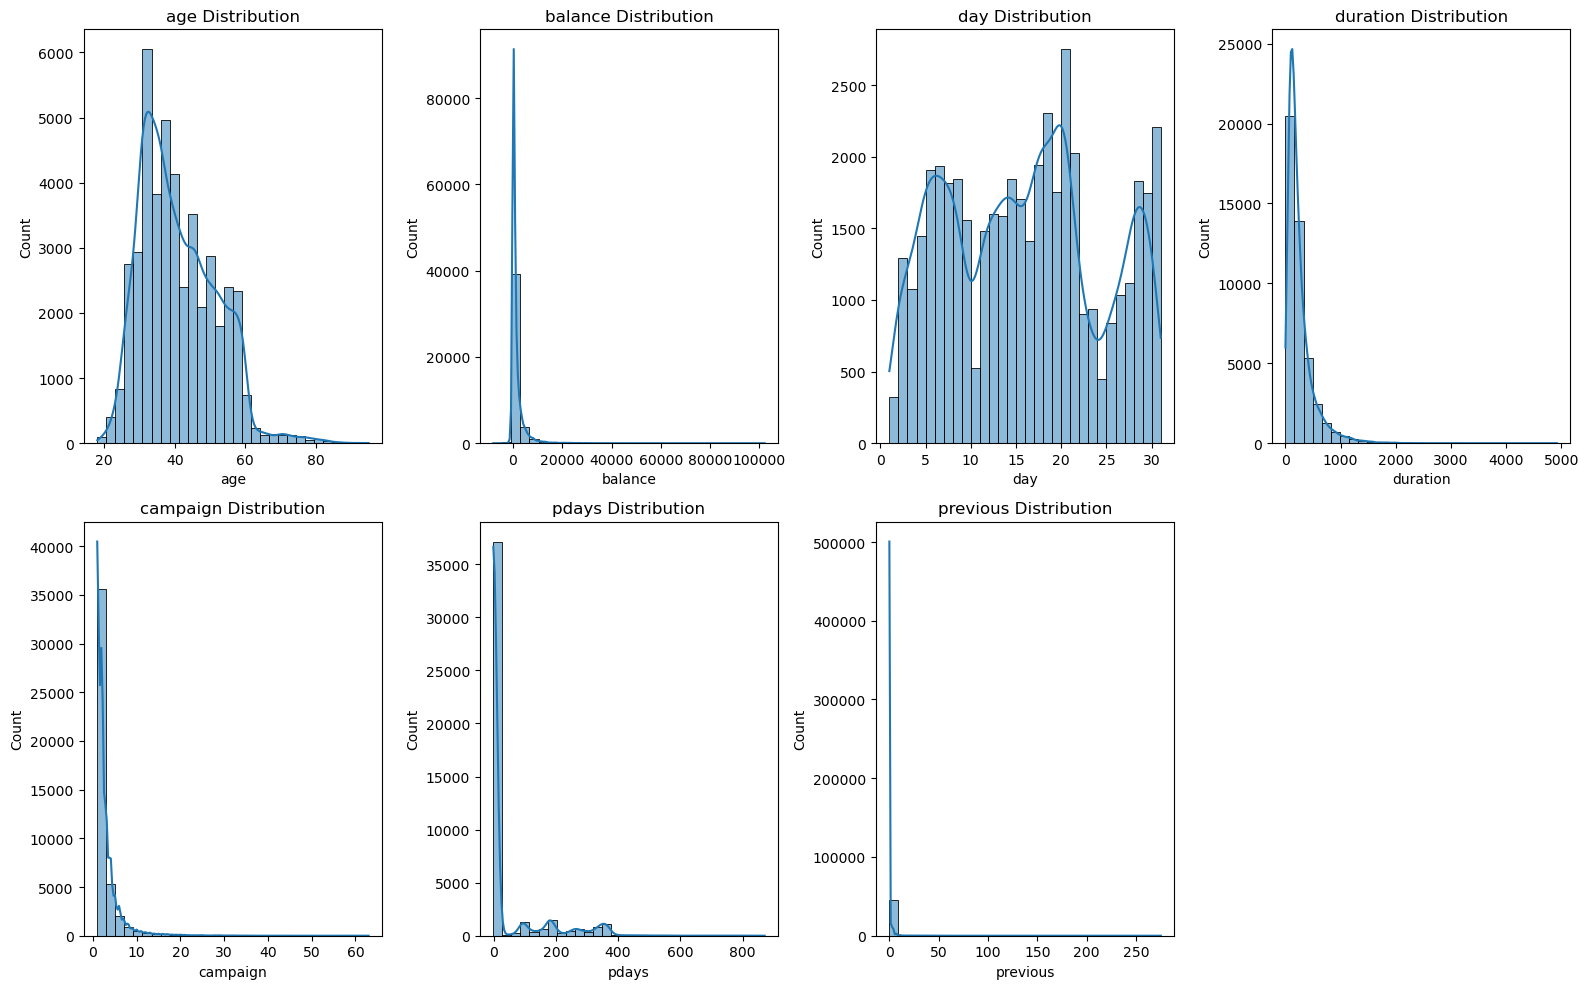

In [9]:
# Histogram Visualization of Numerical Features in Two Rows
import math

num_features = len(numerical_features)
rows = 2
cols = math.ceil(num_features / rows)  # Calculate the number of columns needed

fig, axs = plt.subplots(rows, cols, figsize=(16, 10))
axs = axs.flatten()  # Flatten in case of multiple rows

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'{feature} Distribution')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('Histograms.png', bbox_inches='tight')
plt.show()

=> Countplot for Customer Response:


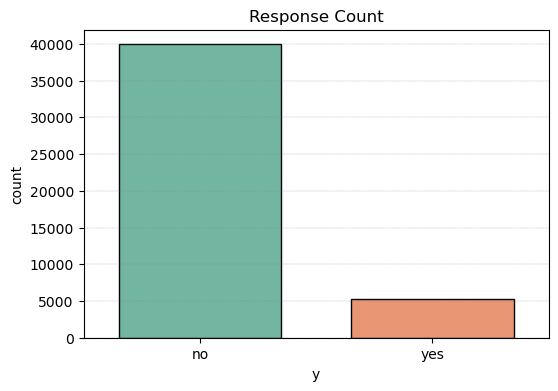

Response Rate (1/0): 
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [10]:
# Print Countplot for Visualization the Distribution of Customer Response

print("=> Countplot for Customer Response:")
plt.figure(figsize=(6,4))
sns.countplot(x="y", hue="y", palette='Set2', edgecolor="black", linewidth=1, data=df, width=0.7)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.2)
plt.title("Response Count")
plt.savefig("Response count.png")
plt.show()

response_ratio = df['y'].value_counts(normalize=True)# Count Value for Response...
print(f"Response Rate (1/0): \n{response_ratio}")# Show Response Ratio...

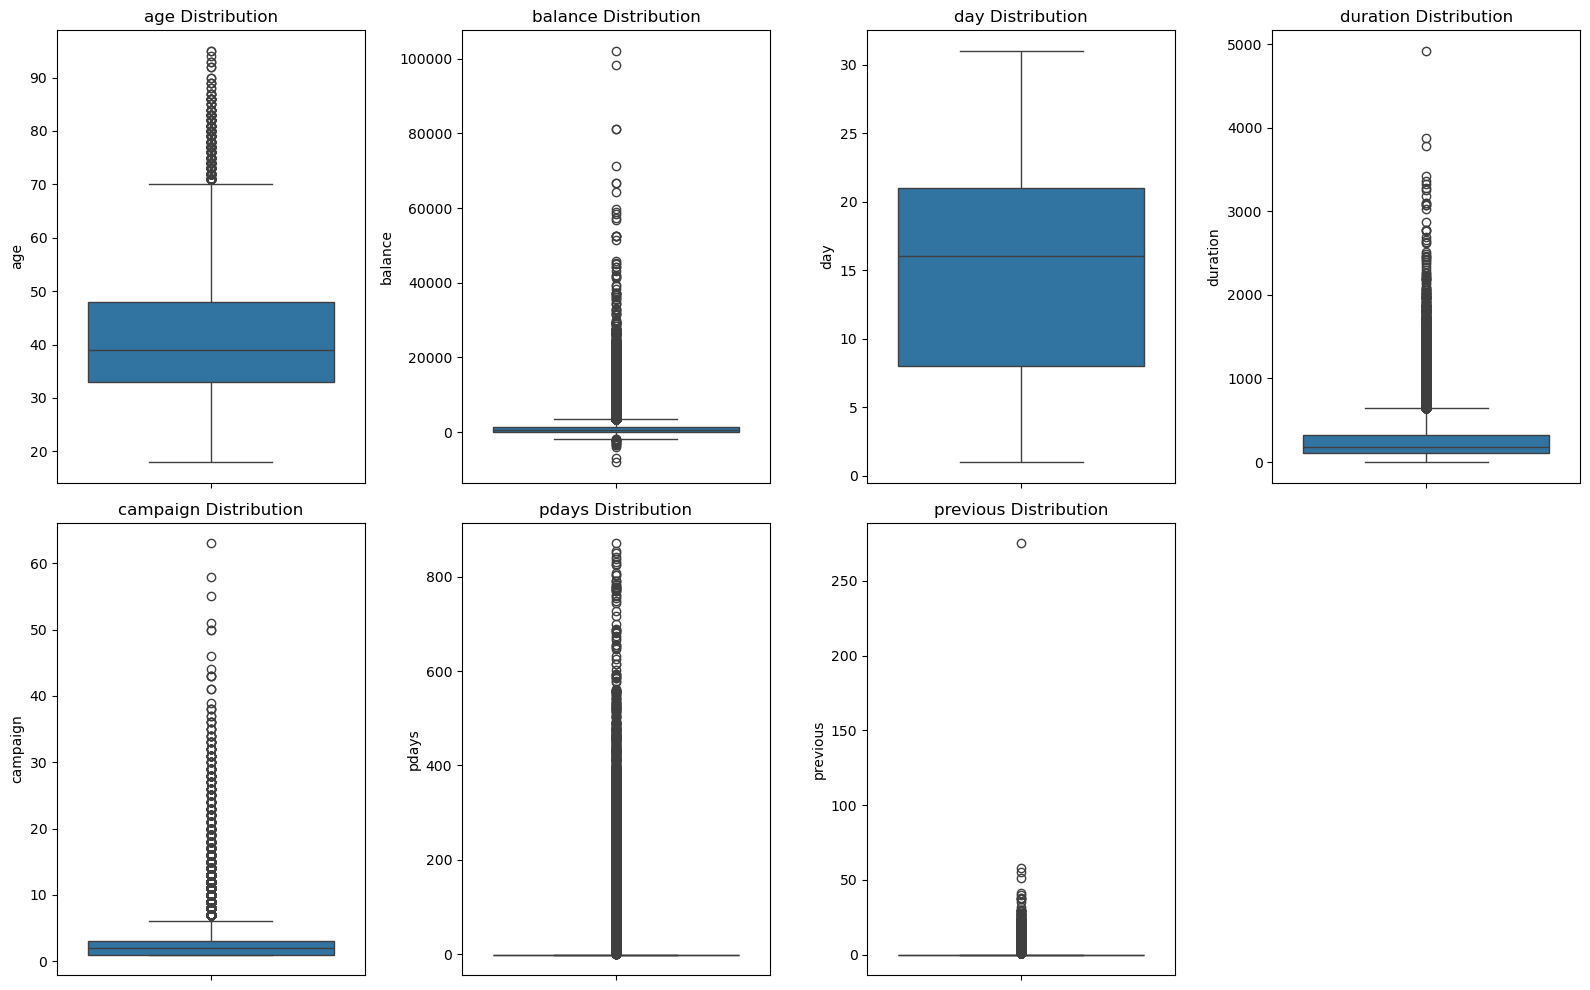

In [11]:
# Print Boxplot for Visualization the Distribution of Numerical Features

num_features = len(numerical_features)
rows = 2
cols = math.ceil(num_features / rows)  # Calculate the number of columns needed

fig, axs = plt.subplots(rows, cols, figsize=(16, 10))
axs = axs.flatten()  # Flatten in case of multiple rows

for i, feature in enumerate(numerical_features):
    sns.boxplot(df[feature], ax=axs[i])
    axs[i].set_title(f'{feature} Distribution')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()

In [12]:
# Data Preprocessing
# Convert categorical variables into numerical variables
df['job'] = df['job'].map({"admin": 0,"unknown": 1,"unemployed": 2,"management": 3,"housemaid": 4,"entrepreneur": 5,
                        "student": 6,"blue-collar": 7,"self-employed": 8,"retired": 9,"technician": 10,"services": 11})
df['marital'] = df['marital'].map({"married": 0,"divorced": 1,"single": 2})
df['education'] = df['education'].map({"unknown": 0,"secondary": 1,"primary": 2,"tertiary": 3})
df['default'] = df['default'].map({"no": 0,"yes": 1})
df['housing'] = df['housing'].map({"no": 0,"yes": 1})
df['loan'] = df['loan'].map({"no": 0,"yes": 1})
df['contact'] = df['contact'].map({"unknown": 0,"telephone": 1,"cellular": 2})
df['month'] = df['month'].map({"jan": 1,"feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,
                             "jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12})
df['poutcome'] = df['poutcome'].map({"unknown": 0,"other": 1,"failure": 2,"success": 3})
df['y'] = df['y'].map({"no": 0,"yes": 1})


In [13]:
# Create Age_Group by Range and also Create Dummy Columns of Age_Group 
df['Age_Group'] = pd.cut(df['age'], bins=[18, 40, 60, 100], labels=['18-40', '40-60', '60+'])
df =pd.get_dummies(df, columns=['Age_Group'], prefix='Age_Group')

=> Heatmap (Alternative):


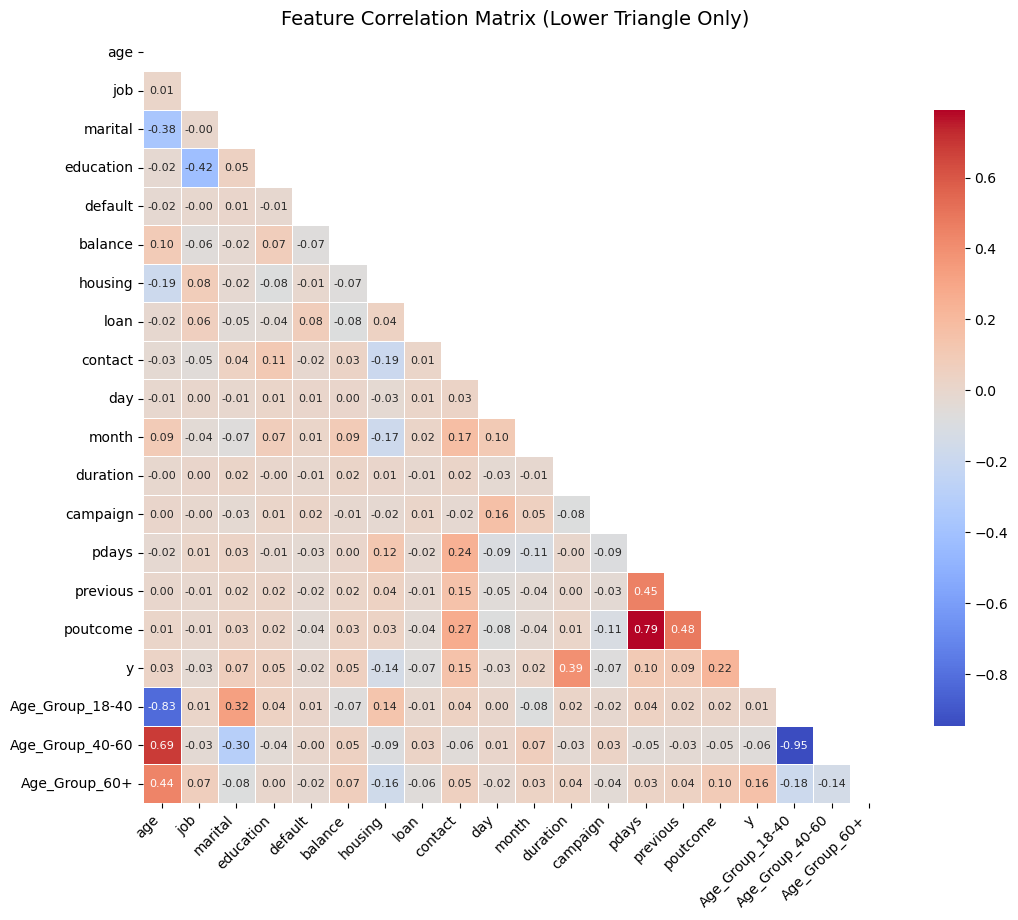

In [14]:
# Correlation Matrix Heatmap with Mask
print("=> Heatmap (Alternative):")

plt.figure(figsize=(12, 10))  # Larger figure for better visibility

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle (optional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap with mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})

# Add a title and adjust layout
plt.title('Feature Correlation Matrix (Lower Triangle Only)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('correlation_matrix_lower_triangle.png', bbox_inches='tight')
plt.show()


In [15]:
# Drop unnecessary columns
df = df.drop(['age','job','education','default','balance','day','month','campaign'], axis=1)
df.head()

,marital,housing,loan,contact,duration,pdays,previous,poutcome,y,Age_Group_18-40,Age_Group_40-60,Age_Group_60+
0,0,1,0,0,261,-1,0,0,0,False,True,False
1,2,1,0,0,151,-1,0,0,0,False,True,False
2,0,1,1,0,76,-1,0,0,0,True,False,False
3,0,1,0,0,92,-1,0,0,0,False,True,False
4,2,0,0,0,198,-1,0,0,0,True,False,False


In [16]:
df.shape

(45211, 12)

In [17]:
# Split the dataset into feature and target variables
X = df.drop('y', axis=1)
y = df['y']

In [18]:
# Balance the data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Save the scaler to a file
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

In [28]:
# Define the model
DTC_model = DecisionTreeClassifier(random_state=42)
RFC_model = RandomForestClassifier(random_state=42)

In [23]:
# Define the hyperparameters for each model
DTC_params = {        
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion':  ['gini', 'entropy']
}

RFC_params = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
}

In [24]:
# Model Evaluation Function

def model_evl(model_name, y_test, pred):
    acc = accuracy_score(y_test, pred)  # Overall correctness
    prc = precision_score(y_test, pred, zero_division=1)  # Correctness of positive predictions
    clf = classification_report(y_test, pred)  # Detailed report of prc, rec, f1 and support for each class
    conf = confusion_matrix(y_test, pred)  # Detailed breakdown of correct and incorrect predictions
    rmse = np.sqrt(mean_squared_error(y_test, pred))  # Average error magnitude
   
    print(f"Model Evaluation for {model_name}:")
    print("Accuracy score =", (round(acc, 2) * 100), "%")  # Print Percentage of Accuracy Score
    print("Precision score =", (round(prc, 2) * 100), "%")  # Print Percentage of Precision Score
    print("Classification Report")
    print(clf)
    print("Confusion Matrix")
    print(conf)
    print("Root Mean Squared Error (RMSE) =", round(rmse, 2))
    print("Model successfully saved...")

In [25]:
# Perform GridSearchCV for DecisionTreeClassifier

Grid_search_DTC = GridSearchCV(estimator=DTC_model, param_grid=DTC_params,
                                         scoring='accuracy', cv=5, n_jobs=-1)
Grid_search_DTC.fit(X_train_scaled, y_train)
print("Best Parameters for DecisionTreeClassifier: ", Grid_search_DTC.best_params_)
best_dtc_model = Grid_search_DTC.best_estimator_
DTC_pred = best_dtc_model.predict(X_test_scaled)


# Perform GridSearchCV for RandomforestClassifier

Grid_search_RFC = GridSearchCV(estimator=RFC_model, param_grid=RFC_params,
                                         scoring='accuracy', cv=5, n_jobs=-1)
Grid_search_RFC.fit(X_train_scaled, y_train)
print("Best Parameters for Random Forest: ", Grid_search_RFC.best_params_)
best_rfc_model = Grid_search_RFC.best_estimator_
RFC_pred = best_rfc_model.predict(X_test_scaled)

Best Parameters for DecisionTreeClassifier:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters for Random Forest:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# DecisionTreeClassifier model evaluation and saved

joblib.dump(Grid_search_DTC,'DTC_model.joblib')
model_evl(DTC_model, y_test, DTC_pred)

Model Evaluation for DecisionTreeClassifier(random_state=42):
Accuracy score = 90.0 %
Precision score = 89.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7908
           1       0.89      0.91      0.90      8061

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969

Confusion Matrix
[[7009  899]
 [ 763 7298]]
Root Mean Squared Error (RMSE) = 0.32
Model successfully saved...


In [27]:
# RandomForestClassifier model evaluation and saved

joblib.dump(Grid_search_RFC,'RFC_model.joblib')
model_evl(RFC_model, y_test, RFC_pred)

Model Evaluation for RandomForestClassifier(random_state=42):
Accuracy score = 90.0 %
Precision score = 89.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      7908
           1       0.89      0.92      0.90      8061

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969

Confusion Matrix
[[6997  911]
 [ 674 7387]]
Root Mean Squared Error (RMSE) = 0.32
Model successfully saved...
